In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import os, shutil

DIR = "Dataset"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="training", seed=42, batch_size=32, smart_resize=True, image_size=(224, 224))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="validation", seed=42, batch_size=32, smart_resize=True, image_size=(224, 224))

Found 23471 files belonging to 5 classes.
Using 21124 files for training.
Found 23471 files belonging to 5 classes.
Using 2347 files for validation.


In [2]:
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [3]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)

['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']


In [4]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)
print(type(test_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [17]:
model = tf.keras.models.load_model("models/Xray_Model.h5")

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

[1. 0. 0. 0.] 
 ['Bacterial Pneumonia', 'COVID', 'Normal', 'Tuberculosis', 'Viral Pneumonia']
Prediction:  Bacterial Pneumonia 100.0%


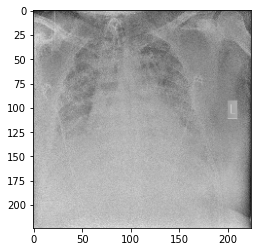

In [19]:
path = "Dataset/COVID/1bc3008e.png"

img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)

plt.imshow(img)
print(predictions[0], "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")

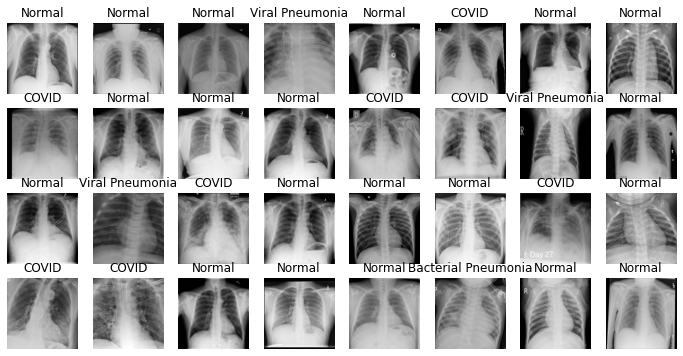

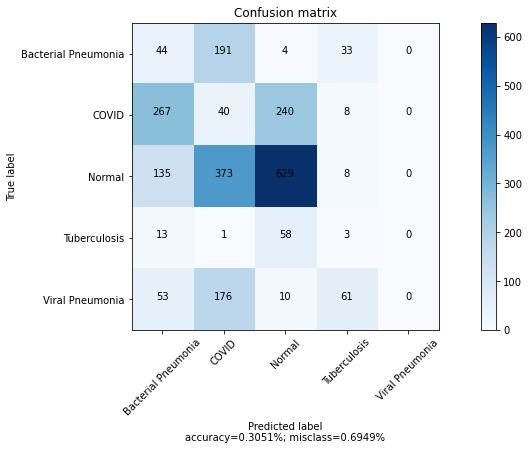

In [12]:
def plot_confusion_matrix(cm, target_names, cmap=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion matrix')
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}%; misclass={:0.4f}%'.format(accuracy, misclass))
    plt.savefig("vgg_cm.png")
    plt.show()

plt.figure(figsize=(12, 6))
true = []
predictions1 = []

for images, labels in test_dataset.take(1900):
  pred = model.predict(images)
  for i in range(32):
    try:
      ax = plt.subplot(4, 8, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      #print(classes[np.argmax(pred[i])], 100 * np.max(pred[i]), "real = " + str(classes[labels[i]]))

      true.append(labels[i])
      predictions1.append(np.argmax(pred[i]))

      plt.title(classes[labels[i]])
      plt.axis("off")
    except:
      print()


plot_confusion_matrix(tf.math.confusion_matrix(true, predictions1), classes)

In [9]:
from sklearn import metrics
print(metrics.classification_report(true, predictions1,target_names=classes ,digits=3,zero_division=0))

                     precision    recall  f1-score   support

Bacterial Pneumonia      0.096     0.173     0.123       185
              COVID      0.058     0.081     0.067       358
             Normal      0.696     0.590     0.639       785
       Tuberculosis      0.015     0.020     0.018        49
    Viral Pneumonia      0.000     0.000     0.000       191

           accuracy                          0.335      1568
          macro avg      0.173     0.173     0.169      1568
       weighted avg      0.373     0.335     0.350      1568



In [10]:
path = "Dataset"
for i in os.listdir(path):
  folderPath = os.path.join(path, i)
  for j in os.listdir(folderPath)[:]:
    fullPath = os.path.join(folderPath, j)
    print(i, classes.index(i))

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial Pneumonia 0
Bacterial 

COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1
COVID 1


Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
Normal 2
N

Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculosis 3
Tuberculos

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneumonia 4
Viral Pneu

(1, 224, 224, 64)
(1, 224, 224, 64)
(1, 112, 112, 64)
(1, 112, 112, 128)
(1, 112, 112, 128)
(1, 56, 56, 128)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 56, 56, 256)
(1, 28, 28, 256)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)
(1, 25088)
(1, 4)


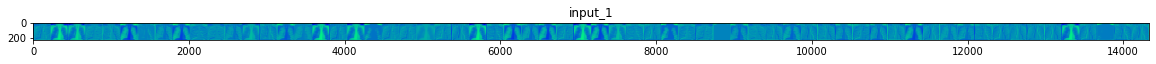

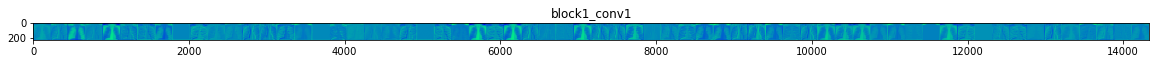

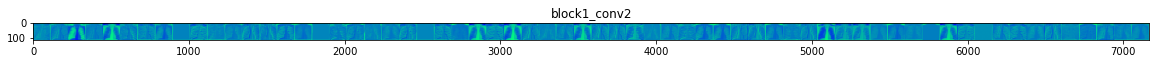

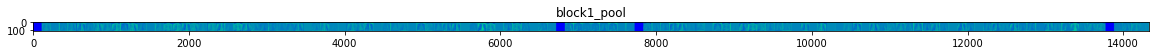

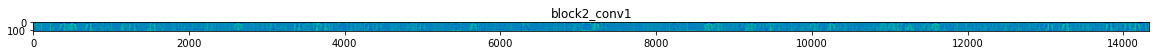

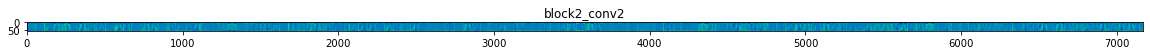

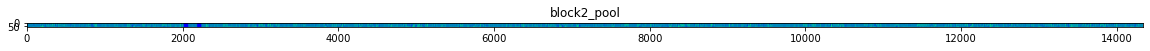

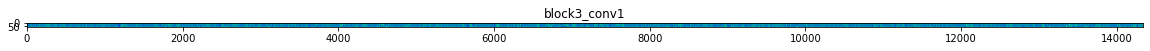

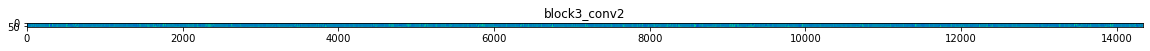

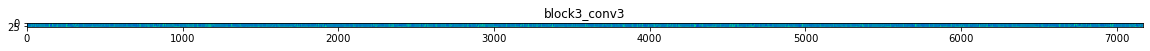

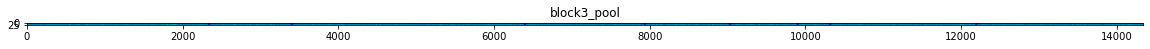

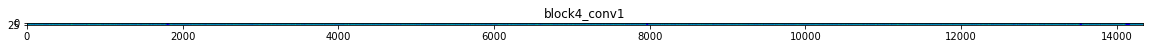

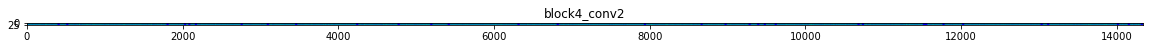

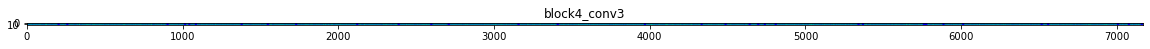

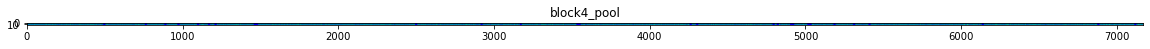

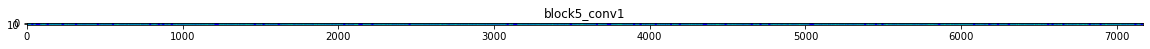

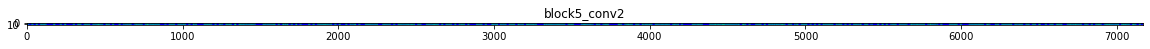

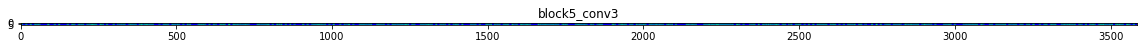

In [11]:
img_path='Tuberculosis-11.png' 

successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))# Convert ht image to Array of dimension (150,150,3)
x   = tf.keras.preprocessing.image.img_to_array(img)                           
x   = x.reshape((1,) + x.shape)# Rescale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)
layer_names = [layer.name for layer in model.layers]

np.seterr(invalid='ignore')

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:       
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
    
    display_grid = np.zeros((size, size * n_features))
    
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 224).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='winter' )